In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as mn

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer

from sklearn import set_config
set_config(display='diagram')

#Nate shared this list as his ultimate go-to during our regresssion hack-a-thon

In [34]:
df_ames_train = pd.read_csv('./datasets/train.csv')

I know I need to split my data into train/test before I do any data transformations and build any models.

In [35]:
df_ames_ridge_cat_train = df_ames_train[['Overall Qual','Gr Liv Area', 'Garage Cars',
'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath',
'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1', 'Neighborhood',
'Open Porch SF', 'Wood Deck SF', 'Lot Area', 'SalePrice']]

In [36]:
df_ames_ridge_cat_train.isna().sum()

Overall Qual      0
Gr Liv Area       0
Garage Cars       1
Total Bsmt SF     1
1st Flr SF        0
Year Built        0
Year Remod/Add    0
Full Bath         0
TotRms AbvGrd     0
Fireplaces        0
BsmtFin SF 1      1
Neighborhood      0
Open Porch SF     0
Wood Deck SF      0
Lot Area          0
SalePrice         0
dtype: int64

In [37]:
#I am totally okay with dropping the rows with missing data
df_ames_ridge_cat_train.dropna(inplace=True)

C:\Users\sarah\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [38]:
df_ames_ridge_cat_train.isna().sum()

Overall Qual      0
Gr Liv Area       0
Garage Cars       0
Total Bsmt SF     0
1st Flr SF        0
Year Built        0
Year Remod/Add    0
Full Bath         0
TotRms AbvGrd     0
Fireplaces        0
BsmtFin SF 1      0
Neighborhood      0
Open Porch SF     0
Wood Deck SF      0
Lot Area          0
SalePrice         0
dtype: int64

In [39]:

X = df_ames_ridge_cat_train[['Overall Qual','Gr Liv Area', 'Garage Cars',
'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath',
'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1','Neighborhood',
'Open Porch SF', 'Wood Deck SF', 'Lot Area']]
y = df_ames_ridge_cat_train['SalePrice']
    

In [40]:
X.shape

(2049, 15)

In [41]:
y.shape

(2049,)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [43]:
X_train.dtypes

Overall Qual        int64
Gr Liv Area         int64
Garage Cars       float64
Total Bsmt SF     float64
1st Flr SF          int64
Year Built          int64
Year Remod/Add      int64
Full Bath           int64
TotRms AbvGrd       int64
Fireplaces          int64
BsmtFin SF 1      float64
Neighborhood       object
Open Porch SF       int64
Wood Deck SF        int64
Lot Area            int64
dtype: object

In [45]:
ct1 = make_column_transformer(
    (OneHotEncoder(drop='first', handle_unknown='ignore'), ['Neighborhood', 'Overall Qual']),
    remainder='passthrough',
     verbose_feature_names_out=False)


In [46]:
pipe3 = make_pipeline(ct1, StandardScaler(), Ridge(max_iter=10_000))

In [47]:
params3 = {
           'ridge__alpha': [.01, 0.1, 1, 10, 100]}

In [48]:
gs3 = GridSearchCV(pipe3, params3, n_jobs=-1)

In [49]:
pipe3.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'standardscaler', 'ridge', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__onehotencoder', 'columntransformer__onehotencoder__categories', 'columntransformer__onehotencoder__drop', 'columntransformer__onehotencoder__dtype', 'columntransformer__onehotencoder__handle_unknown', 'columntransformer__onehotencoder__sparse', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'ridge__alpha', 'ridge__copy_X', 'ridge__fit_intercept', 'ridge__max_iter', 'ridge__normalize', 'ridge__positive', 'ridge__random_state', 'ridge__solver', 'ridge__tol'])

In [50]:
ct1.get_feature_names_out



<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['Neighborhood', 'Overall Qual'])],
                  verbose_feature_names_out=False)>

In [51]:
gs3.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Neighborhood',
                                                                          'Overall '
                                                                          'Qual'])],
                                                          verbose_feature_names_out=False)),
                                       ('standardscaler', StandardScaler()),
                                       ('ridge', Ridge(max_iter=10000))]),
             n_jobs=-1, param_grid={'ridge__alpha': [0.01, 0.1, 1, 10, 100]})

In [52]:
pd.DataFrame(gs3.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015404,0.002577,0.005613,0.001196,0.01,{'ridge__alpha': 0.01},0.901263,0.846508,0.899425,0.703234,0.864544,0.842995,0.072924,5
1,0.012249,0.003344,0.004407,0.000486,0.1,{'ridge__alpha': 0.1},0.901385,0.846515,0.899448,0.703196,0.864545,0.843018,0.072962,4
2,0.010401,0.003383,0.005202,0.001470,1,{'ridge__alpha': 1},0.902038,0.846546,0.899637,0.702887,0.864428,0.843107,0.073207,3
3,0.010602,0.002800,0.005202,0.001469,10,{'ridge__alpha': 10},0.902393,0.846158,0.900551,0.703097,0.863534,0.843146,0.073272,2
4,0.011805,0.003968,0.004398,0.000801,100,{'ridge__alpha': 100},0.902076,0.841658,0.903072,0.712138,0.859362,0.843661,0.069987,1


In [53]:
gs3.best_params_

{'ridge__alpha': 100}

In [54]:
gs3.best_estimator_.named_steps

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore'),
                                  ['Neighborhood', 'Overall Qual'])],
                   verbose_feature_names_out=False),
 'standardscaler': StandardScaler(),
 'ridge': Ridge(alpha=100, max_iter=10000)}

In [55]:
gs3.best_estimator_.named_steps['standardscaler'].get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28',
       'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37',
       'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46',
       'x47', 'x48'], dtype=object)

In [56]:
gs3.best_params_

{'ridge__alpha': 100}

In [57]:
gs3.best_score_

0.8436609368294994

In [58]:
cols_g3 = gs3.best_estimator_.named_steps.get('columntransformer').get_feature_names_out()
cols_g3

array(['Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_Greens', 'Neighborhood_GrnHill',
       'Neighborhood_IDOTRR', 'Neighborhood_Landmrk',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'Overall Qual_2', 'Overall Qual_3',
       'Overall Qual_4', 'Overall Qual_5', 'Overall Qual_6',
       'Overall Qual_7', 'Overall Qual_8', 'Overall Qual_9',
       'Overall Qual_10', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF',
       '1st Flr SF', 'Year Built'

In [59]:
gs3.best_estimator_.named_steps['ridge'].coef_

array([-1109.99467373, -1386.36531395,   737.98914875,   323.19422307,
         177.22847562,  4250.95530265, -2755.26163822, -1234.81413499,
        -735.82022387,  3596.6335894 , -1850.50952467,  -404.84497881,
       -2114.92426528, -1569.36157494,  -911.08577011, -1532.7099014 ,
       -1164.78098156,  5295.81231037,  6460.3013902 , -1729.52216112,
        -546.01490078, -1191.67617241,  -675.58190369,  2339.42350551,
        5946.18811239,  1476.92756198,  -293.59397035, -1406.90382747,
       -2724.58219484, -4656.88410371, -6190.29481646, -3772.22170359,
        1098.10990565,  8995.20150702, 16766.88848747, 10425.19491951,
       16899.90599011,  5875.13844493,  7405.03402018,   558.44952404,
        7047.66380634,  8350.61560618,  1448.10309039,  1825.86363659,
        6684.79919276,  8516.4786391 ,   455.37608956,  1173.68859137,
        4868.74400097])

In [60]:
pd.DataFrame(zip(cols_g3, 
gs3.best_estimator_.named_steps['ridge'].coef_))

,0,1
0,Neighborhood_Blueste,-1109.994674
1,Neighborhood_BrDale,-1386.365314
2,Neighborhood_BrkSide,737.989149
3,Neighborhood_ClearCr,323.194223
4,Neighborhood_CollgCr,177.228476
5,Neighborhood_Crawfor,4250.955303
6,Neighborhood_Edwards,-2755.261638
7,Neighborhood_Gilbert,-1234.814135
8,Neighborhood_Greens,-735.820224
9,Neighborhood_GrnHill,3596.633589


In [61]:
gs3.best_estimator_.named_steps['ridge'].intercept_

182134.876953125

In [62]:
gs3.score(X_test, y_test)

0.8107962539754157

In [63]:
#Make predictions on the test set
preds = gs3.predict(X_test)

In [64]:
#Evaluate my metrics
print('Ridge Model #2 w/Categorical Vars, drop first: MAE:', mean_absolute_error(y_test, preds))
print('Ridge Model #2 w/Categorical Vars, drop first: MSE:', mean_squared_error(y_test, preds))
print('Ridge Model #2 w/Categorical Vars, drop first: R2:', r2_score(y_test, preds))

Ridge Model #2 w/Categorical Vars, drop first: MAE: 17958.983354487144
Ridge Model #2 w/Categorical Vars, drop first: MSE: 1177288517.7986782
Ridge Model #2 w/Categorical Vars, drop first: R2: 0.8107962539754157


This is not my best model. The Rsquared here is .7959 which does not beat the Ridge model with all the categorical variables: .8723 compared to .8561 for the Ridge model without the categorical variables versus .7186 for the Lasso model,  -.0037 for the baseline model and .5667 for the linear regression model.

In [65]:
#STOPPED HERE - DIDN'T FIT ANYTHING FOR KAGGLE

In [66]:
#I want to look at some graphs of my residuals
residuals = preds - y_test

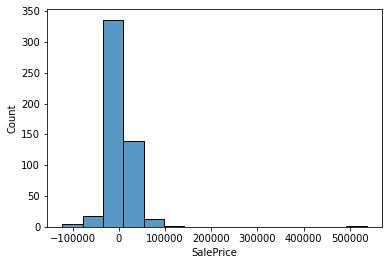

In [67]:
sns.histplot(residuals, bins=15);
#This looks like a normal distribution so this doesn't look too bad.

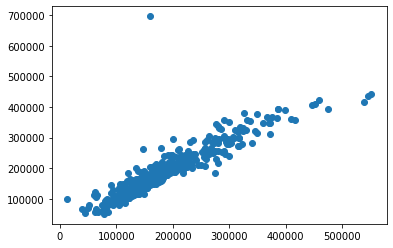

In [68]:
plt.scatter(y_test, preds);
#This doesn't look too bad!

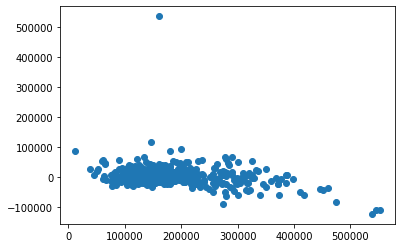

In [69]:
plt.scatter(y_test, residuals);
#That outlier at 200,000 is strange.

In [70]:
#Now, I want to use my Ridge model to score the separate test dataset so 
# that I can submit a csv file to Kaggle for the contest.

df_ames_test = pd.read_csv('./datasets/test.csv')

In [71]:
df_ames_test.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD


In [72]:
#Pull off only the data I need
df_mini_ridge_ohe_test = df_ames_test[['Overall Qual', 'Gr Liv Area', 'Garage Cars',
'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath',
'TotRms AbvGrd', 'Fireplaces', 'BsmtFin SF 1', 'Neighborhood',
'Open Porch SF', 'Wood Deck SF', 'Lot Area']]

In [73]:
#Yay!  No missing data here!
df_mini_ridge_ohe_test.isna().sum()

Overall Qual      0
Gr Liv Area       0
Garage Cars       0
Total Bsmt SF     0
1st Flr SF        0
Year Built        0
Year Remod/Add    0
Full Bath         0
TotRms AbvGrd     0
Fireplaces        0
BsmtFin SF 1      0
Neighborhood      0
Open Porch SF     0
Wood Deck SF      0
Lot Area          0
dtype: int64

In [74]:
df_mini_ridge_ohe_test.describe()

,Overall Qual,Gr Liv Area,Garage Cars,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath,TotRms AbvGrd,Fireplaces,BsmtFin SF 1,Open Porch SF,Wood Deck SF,Lot Area
count,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,6.050114,1496.914579,1.742597,1034.357631,1145.787016,1970.492027,1984.417995,1.539863,6.454442,0.618451,441.328018,47.070615,93.430524,10307.033030
std,1.369065,506.468967,0.750391,413.446291,375.264111,30.395895,20.450725,0.559060,1.596632,0.669571,438.457329,68.180939,121.181702,10002.674602
min,2.000000,407.000000,0.000000,0.000000,407.000000,1880.000000,1950.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1477.000000
25%,5.000000,1114.000000,1.000000,789.000000,864.000000,1954.000000,1967.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,7297.250000
50%,6.000000,1436.000000,2.000000,975.000000,1063.000000,1972.000000,1992.000000,2.000000,6.000000,1.000000,373.000000,27.000000,0.000000,9446.000000
75%,7.000000,1779.000000,2.000000,1247.000000,1358.000000,1999.750000,2003.000000,2.000000,7.000000,1.000000,734.750000,69.750000,170.750000,11589.000000
max,10.000000,4476.000000,4.000000,2630.000000,2674.000000,2010.000000,2010.000000,4.000000,12.000000,3.000000,2288.000000,742.000000,690.000000,215245.000000


In [75]:
X_mini_ridge_ohe_test = df_mini_ridge_ohe_test

In [76]:
preds_rdg_kag = gs3.predict(X_mini_ridge_ohe_test)

In [77]:
df_ames_test['SalePrice'] = preds_rdg_kag

In [78]:
#df_ames_test[['Id', 'SalePrice']].to_csv('./datasets/rdg_predictions_ohe.csv', index = False)

#Used code from Chuck's Breakfast Hour Quiz3 Review

In [79]:
#df_kaggle = pd.read_csv('./datasets/rdg_predictions_ohe.csv')

In [80]:
df_kaggle.head(2)

NameError: name 'df_kaggle' is not defined